In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")

variable called url; contains address to CSV (Comma-separated values)

In [12]:
df = pd.read_csv(url, index_col='Date',
                 parse_dates=True, dayfirst=True)

df= dataFrame, pd=pandas; 
pandas defines read_csv() function; will download file, parse it, returns a df
need to specify some things 
-> df now contains the file/dataframe object

In [14]:
df.head(6)

Unnamed: 1  Berri1  CSC  Mais1  Mais2  Parc  PierDup  Rachel1  \
Date                                                                       
2013-01-01      00:00       0    0      1      0     6        0        1   
2013-01-02      00:00      69    0     13      0    18        0        2   
2013-01-03      00:00      69    2     21      6    22        1        0   
2013-01-04      00:00      80    0     22      4    16        0      125   
2013-01-05      00:00      52    4     19      3    12        0       97   
2013-01-06      00:00      37    0     23     46     8        0       47   

            Totem_Laurier  
Date                       
2013-01-01              0  
2013-01-02              0  
2013-01-03              0  
2013-01-04              0  
2013-01-05              0  
2013-01-06              0

nhead(n) displays n rows of table
it displays a df object in HTML table

-instead of 2 i chose 6

In [15]:
df.describe()

Berri1          CSC        Mais1        Mais2         Parc  \
count   261.000000   261.000000   261.000000   261.000000   261.000000   
mean   2743.390805  1221.858238  1757.590038  3224.130268  1669.425287   
std    2247.957848  1070.037364  1458.793882  2589.514354  1363.738862   
min       0.000000     0.000000     1.000000     0.000000     6.000000   
25%     392.000000    12.000000   236.000000   516.000000   222.000000   
50%    2771.000000  1184.000000  1706.000000  3178.000000  1584.000000   
75%    4767.000000  2168.000000  3158.000000  5812.000000  3068.000000   
max    6803.000000  3330.000000  4716.000000  7684.000000  4103.000000   

           PierDup      Rachel1  Totem_Laurier  
count   261.000000   261.000000     261.000000  
mean   1152.885057  3084.425287    1858.793103  
std    1208.848429  2380.255540    1434.899574  
min       0.000000     0.000000       0.000000  
25%      12.000000   451.000000     340.000000  
50%     818.000000  3111.000000    2087.000000  
75%    2104.000000  5338.000000    3168.000000  
max    4841.000000  8555.000000    4293.000000

summary statistics of the table

<Axes: xlabel='Date'>

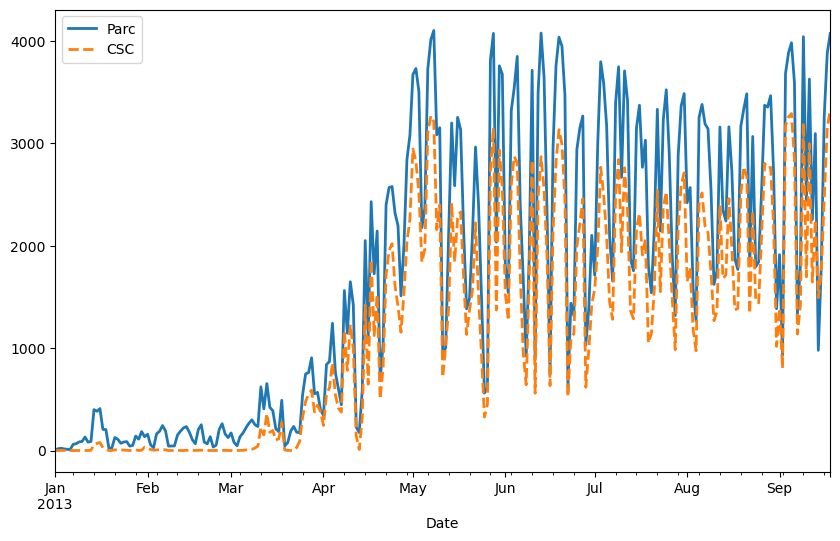

In [31]:
df[['Parc', 'CSC']].plot(figsize=(10, 6),
                               style=['-', '--'],
                               lw=2)

Chosen 2 Columns: Berr1, PierDup probably from the file and called the plot
-> plit daily attandance 

i chose Parc and CSC instead of Berry1 and the other one

In [19]:
df.index.day_name()


Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=261)

Index attribute of the df-object contains dates of all rows, few date-related attributes

In [20]:
df_week = df.groupby(df.index.weekday).sum()
df_week

Unnamed: 1  Berri1    CSC  Mais1  \
Date                                                                            
0     00:0000:0000:0000:0000:0000:0000:0000:0000:000...  106826  51646  68087   
1     00:0000:0000:0000:0000:0000:0000:0000:0000:000...  117244  54656  76974   
2     00:0000:0000:0000:0000:0000:0000:0000:0000:000...  120434  59604  79033   
3     00:0000:0000:0000:0000:0000:0000:0000:0000:000...  115193  52340  76273   
4     00:0000:0000:0000:0000:0000:0000:0000:0000:000...  105701  44252  71605   
5     00:0000:0000:0000:0000:0000:0000:0000:0000:000...   75754  27226  45947   
6     00:0000:0000:0000:0000:0000:0000:0000:0000:000...   74873  29181  40812   

       Mais2   Parc  PierDup  Rachel1  Totem_Laurier  
Date                                                  
0     129982  69767    44500   119211          72883  
1     141217  74299    40679   123533          76559  
2     145860  80437    42564   125173          79501  
3     141424  73668    36349   120684          74540  
4     127526  64385    36850   118556          71426  
5      79743  35544    46149    97143          56438  
6      75746  37620    53812   100735          53798

groupby() = to group the table elements

Text(0.5, 0, 'Weekday')

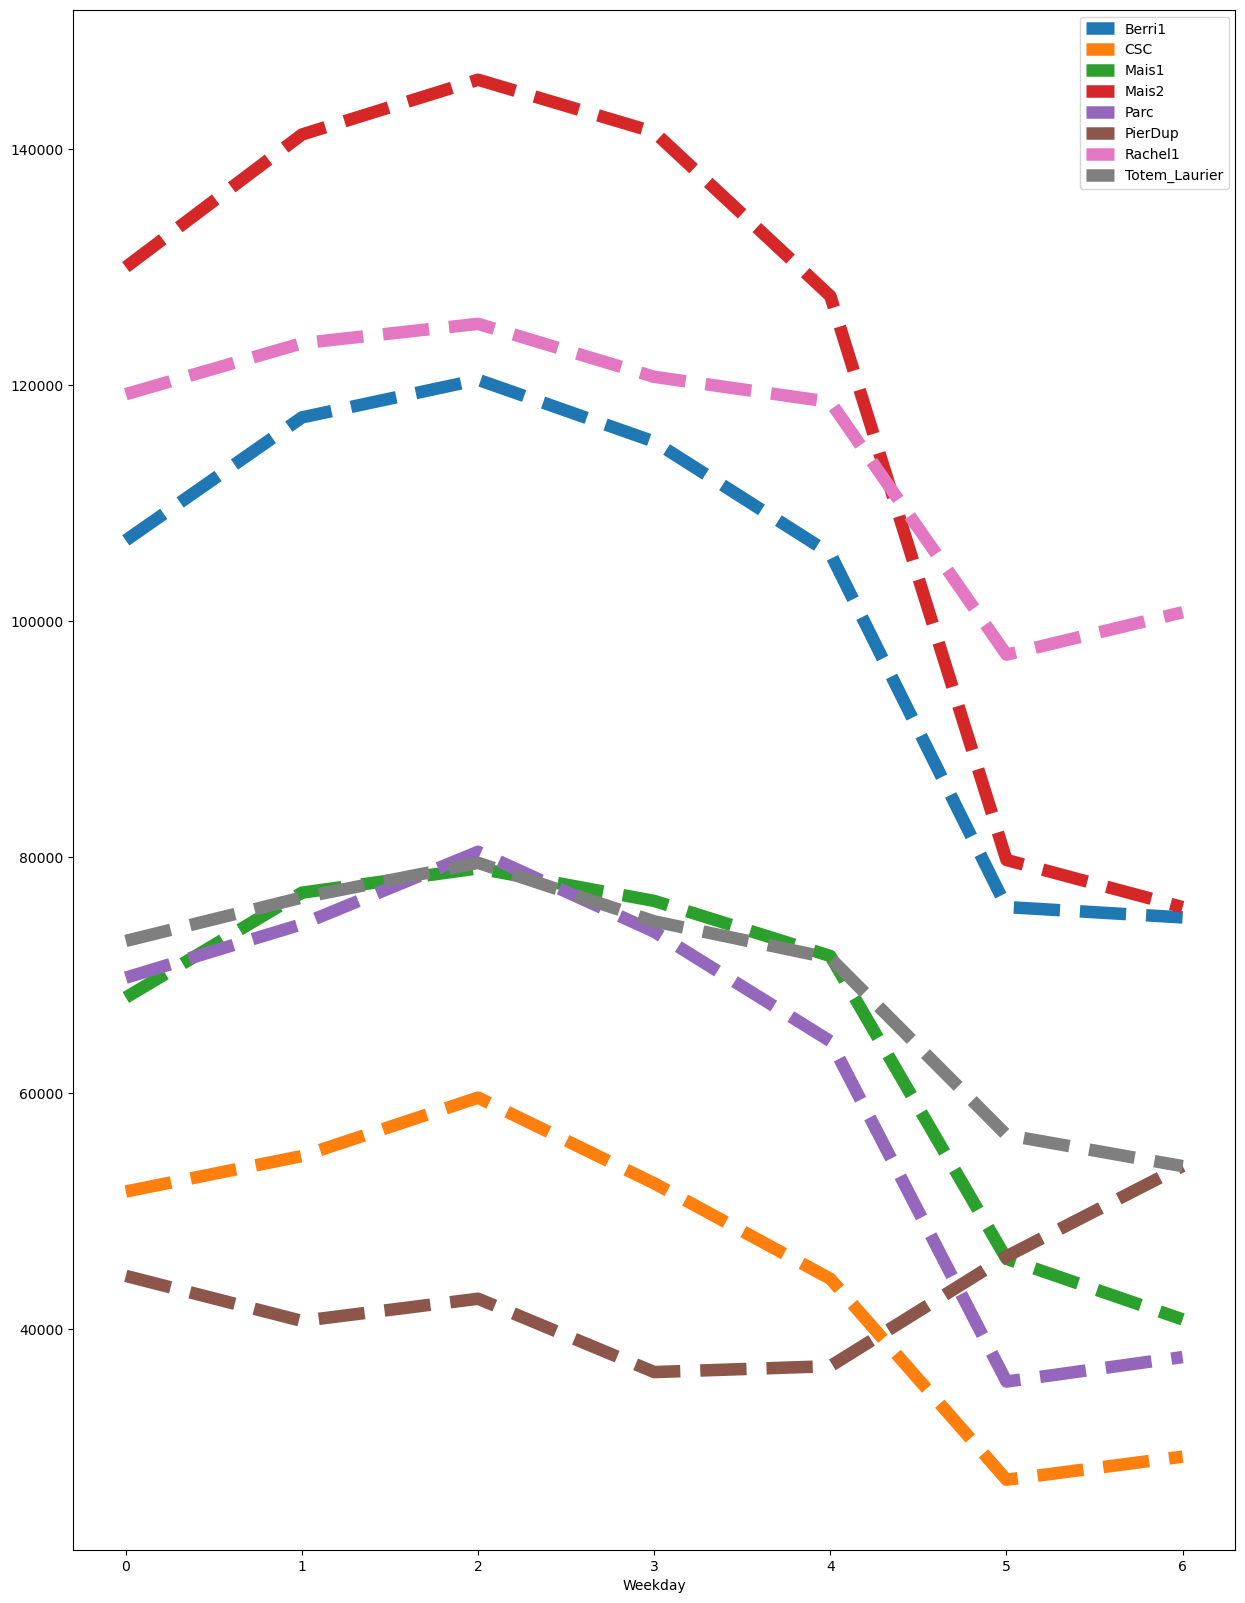

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
df_week.plot(style='--', lw=9, ax=ax)
ax.set_xlabel('Weekday')


information displayed in a chart
matplotlib figure, plot() of df to create plot

changed: 
lw:2->9
figsize: 10/8 -> 15/20
style: -0 -> --

In [27]:
weeklabels= ['Monday,Tuesday,Wednesday,Thursday,'
     'Friday,Saturday,Sunday']
ax.set_xticks(np.arange(len(weeklabels)), labels= weeklabels)
ax.set_ylim(0)

(0.0, 151791.7)

In [55]:
from ipywidgets import interact

@interact
def plot(n=(1, 30)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df['Berri1'].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(0, 7000)
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-inâ€¦

In [ ]:
should be an interactive illustration